## Set up

Import all neccesary libraries

In [40]:
import pandas as pd
import numpy as np
from datetime import date
import re

from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier

Read data

In [41]:
train_work = pd.read_csv('work_train.csv')
test_work = pd.read_csv('work_test.csv')
train_info = pd.read_csv('info_train.csv')
test_info = pd.read_csv('info_test.csv')
train_label = pd.read_csv('label_train.csv')
test_label = pd.read_csv('label_test.csv')

## EDA

In [42]:
train_work['job/role'].value_counts()

Công nhân                                               11728
Giáo viên                                               10537
Nhân viên                                                9306
Công nhân vận hành máy may                               7122
Công nhân sản xuất                                       5505
                                                        ...  
Tổ trưởng tổ thiết kế thuộc phòng kỹ thuật công nghệ        1
Kỹ sư lâm nghiệp phòng kế hoạch kỹ thuật                    1
Cấp dương ( HĐLĐ)                                           1
Cấp dưỡng (HĐLĐ)                                            1
Công nhân làm đường, xí nghiệp xây lắp 3                    1
Name: job/role, Length: 28355, dtype: int64

<AxesSubplot:>

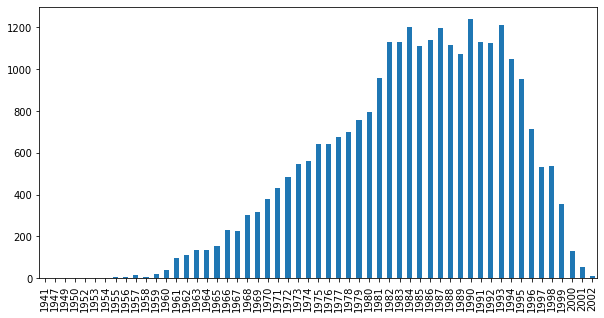

In [43]:
train_info["bithYear"].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(10, 5))

<AxesSubplot:>

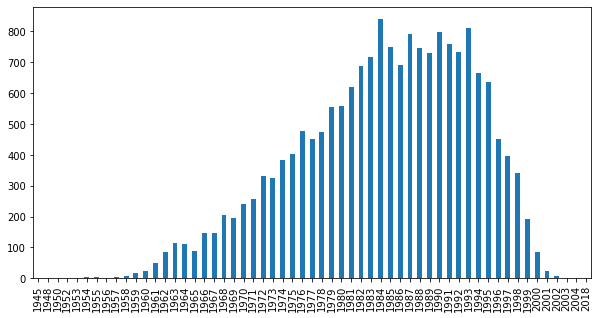

In [44]:
test_info["bithYear"].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(10, 5))

<AxesSubplot:>

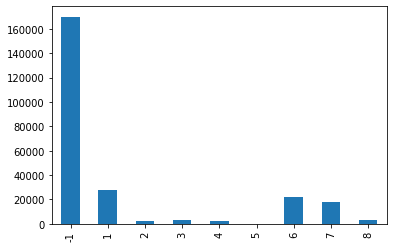

In [45]:
train_work["company_type"].value_counts().sort_index(ascending=True).plot(kind='bar')

<AxesSubplot:>

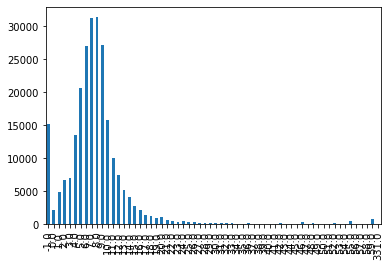

In [46]:
train_work["employee_lv"].value_counts().sort_index(ascending=True).plot(kind='bar')

## Data cleansing

In [47]:
def normalize_vietnamese_accents(s):
    s = re.sub('[áàảãạăắằẳẵặâấầẩẫậ]', 'a', s)
    s = re.sub('[éèẻẽẹêếềểễệ]', 'e', s)
    s = re.sub('[óòỏõọôốồổỗộơớờởỡợ]', 'o', s)
    s = re.sub('[íìỉĩị]', 'i', s)
    s = re.sub('[úùủũụưứừửữự]', 'u', s)
    s = re.sub('[ýỳỷỹỵ]', 'y', s)
    s = re.sub('đ', 'd', s)
    return s

Home address

In [48]:
train_info['address'].fillna('NA', inplace=True)
train_info['address'] = train_info['address'].str.strip()
train_info['address'] = train_info['address'].str.lower()
train_info['address'] = train_info['address'].apply(normalize_vietnamese_accents)

In [49]:
test_info['address'].fillna('NA', inplace=True)
test_info['address'] = test_info['address'].str.strip()
test_info['address'] = test_info['address'].str.lower()
test_info['address'] = test_info['address'].apply(normalize_vietnamese_accents)

Job/role

In [50]:
train_work['job/role'].fillna('NA', inplace=True)
train_work['job/role'] = train_work['job/role'].str.strip()
train_work['job/role'] = train_work['job/role'].str.lower()
train_work['job/role'] = train_work['job/role'].apply(normalize_vietnamese_accents)

In [51]:
test_work['job/role'].fillna('NA', inplace=True)
test_work['job/role'] = test_work['job/role'].str.strip()
test_work['job/role'] = test_work['job/role'].str.lower()
test_work['job/role'] = test_work['job/role'].apply(normalize_vietnamese_accents)

Employee lv

In [52]:
train_work['employee_lv'] = train_work['employee_lv'].fillna(np.median(train_work['employee_lv'].dropna()))

In [53]:
test_work['employee_lv'] = test_work['employee_lv'].fillna(np.median(test_work['employee_lv'].dropna()))

Work address

In [54]:
train_work['address'].fillna('NA', inplace=True)
train_work['address'] = train_work['address'].str.strip()
train_work['address'] = train_work['address'].str.lower()
train_work['address'] = train_work['address'].apply(normalize_vietnamese_accents)

In [55]:
test_work['address'].fillna('NA', inplace=True)
test_work['address'] = test_work['address'].str.strip()
test_work['address'] = test_work['address'].str.lower()
test_work['address'] = test_work['address'].apply(normalize_vietnamese_accents)

Id office

In [56]:
train_work["id_office"].fillna('ZZ0000Z', inplace=True)
train_work["id_office_1"] = train_work["id_office"].map(lambda x: x[0:2])
train_work["id_office_2"] = train_work["id_office"].map(lambda x: x[2:])

In [57]:
test_work["id_office"].fillna('ZZ0000Z', inplace=True)
test_work["id_office_1"] = test_work["id_office"].apply(lambda x: x[0:2])
test_work["id_office_2"] = test_work["id_office"].apply(lambda x: x[2:])

Age

In [58]:
current_year = date.today().year

train_info["age"] = current_year - train_info["bithYear"]
test_info["age"] = current_year - test_info["bithYear"]

train_info["age_class"] = (train_info["age"] // 10).astype(str)
test_info["age_class"] = (test_info["age"] // 10).astype(str)

Time series

In [59]:
def date_normalize(s):
    s = str(s)[0:6]
    s = pd.to_datetime(s, format="%Y%m")
    return s

In [60]:
train_work["from_date"] = train_work["from_date"].apply(date_normalize)
train_work["to_date"] = train_work["to_date"].apply(date_normalize)

test_work["from_date"] = test_work["from_date"].apply(date_normalize)
test_work["to_date"] = test_work["to_date"].apply(date_normalize)

train_work["work_time"] = (train_work["to_date"] - train_work["from_date"]).dt.days
test_work["work_time"] = (test_work["to_date"] - test_work["from_date"]).dt.days

In [61]:
train_info

,bithYear,gender,address,id_bh,age,age_class
0,1971,MALE,ha noi,113039360,51,5
1,1993,FEMALE,thanh pho ha noi,116074930,29,2
2,1977,MALE,na,203060233,45,4
3,1996,FEMALE,na,131373210,26,2
4,1971,MALE,na,198079441,51,5
...,...,...,...,...,...,...
27497,1985,FEMALE,vinh phuc,2615101097,37,3
27498,1985,FEMALE,na,2611027516,37,3
27499,1986,FEMALE,vinh phuc,2612210147,36,3
27500,1975,MALE,na,7516183730,47,4


In [62]:
train_work

,id,id_bh,id_management,id_office,company_type,job/role,from_date,to_date,employee_lv,address,id_office_1,id_office_2,work_time
0,1,113039360,106,TF2212F,-1,giam doc,2013-01-01,2015-12-01,7.0,ha noi,TF,2212F,1064
1,1,113039360,106,TF2212F,-1,giam doc,2016-01-01,2022-04-01,10.0,ha noi,TF,2212F,2282
2,2,116074930,102,TB16010,-1,nhan vien le tan,2016-06-01,2016-12-01,7.0,ha noi,TB,16010,183
3,2,116074930,102,TB16010,-1,nhan vien le tan,2017-01-01,2017-03-01,8.0,ha noi,TB,16010,59
4,2,116074930,102,ZZ0000Z,-1,na,2017-04-01,2017-07-01,-1.0,na,ZZ,0000Z,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247554,55008,2616117553,2600,YN0027Z,-1,cong nhan dm robot,2010-08-01,2010-09-01,2.0,na,YN,0027Z,31
247555,55008,2616117553,2600,ZZ0000Z,-1,na,2010-10-01,2016-10-01,-1.0,na,ZZ,0000Z,2192
247556,55008,2616117553,2600,TZ0085Z,1,phu kho,2016-11-01,2017-12-01,6.0,vinh phuc,TZ,0085Z,395
247557,55008,2616117553,2600,TZ0085Z,1,phu kho,2018-01-01,2019-12-01,8.0,vinh phuc,TZ,0085Z,699


## Feature engineering

In [63]:
train = pd.merge(train_info, train_label, on='id_bh', how="inner")
test = test_info

Add features to the training set

In [64]:
train["employee_lv_first_work"] = train_work.drop_duplicates(subset=['id_bh'], keep='first')["employee_lv"].values
test["employee_lv_first_work"] = test_work.drop_duplicates(subset=['id_bh'], keep='first')["employee_lv"].values

train["employee_lv_last_work"] = train_work.drop_duplicates(subset=['id_bh'], keep='last')["employee_lv"].values
test["employee_lv_last_work"] = test_work.drop_duplicates(subset=['id_bh'], keep='last')["employee_lv"].values

train["count_job"] = train_work.groupby(["id_bh"]).size().reindex(train["id_bh"].values).values
test["count_job"] = test_work.groupby(["id_bh"]).size().reindex(test["id_bh"].values).values

for m in ["sum", "mean", "min", "max"]:
    train["{}_work_time".format(m)] = train_work.groupby(["id_bh"])["work_time"].agg(m).reindex(train["id_bh"].values).values

for m in ["mean", "min", "max"]:
    train["{}_employee_lv".format(m)] = train_work.groupby(["id_bh"])["employee_lv"].agg(m).reindex(train["id_bh"].values).values

for m in ["sum", "mean", "min", "max"]:
    test["{}_work_time".format(m)] = test_work.groupby(["id_bh"])["work_time"].agg(m).reindex(test["id_bh"].values).values

for m in ["mean", "min", "max"]:
    test["{}_employee_lv".format(m)] = test_work.groupby(["id_bh"])["employee_lv"].agg(m).reindex(test["id_bh"].values).values

In [65]:
train["id_management_last_work"] = train_work.drop_duplicates(subset=['id_bh'], keep='last')["id_management"].values
train["id_office_last_work"] = train_work.drop_duplicates(subset=['id_bh'], keep='last')["id_office"].values
train["id_office_1_last_work"] = train_work.drop_duplicates(subset=['id_bh'], keep='last')["id_office_1"].values
train["id_office_2_last_work"] = train_work.drop_duplicates(subset=['id_bh'], keep='last')["id_office_2"].values
train["company_type_last_work"] = train_work.drop_duplicates(subset=['id_bh'], keep='last')["company_type"].values
train["job/role_last_work"] = train_work.drop_duplicates(subset=['id_bh'], keep='last')["job/role"].values
train["work_address_last_work"] = train_work.drop_duplicates(subset=['id_bh'], keep='last')["address"].values

In [66]:
test["id_management_last_work"] = test_work.drop_duplicates(subset=['id_bh'], keep='last')["id_management"].values
test["id_office_last_work"] = test_work.drop_duplicates(subset=['id_bh'], keep='last')["id_office"].values
test["id_office_1_last_work"] = test_work.drop_duplicates(subset=['id_bh'], keep='last')["id_office_1"].values
test["id_office_2_last_work"] = test_work.drop_duplicates(subset=['id_bh'], keep='last')["id_office_2"].values
test["company_type_last_work"] = test_work.drop_duplicates(subset=['id_bh'], keep='last')["company_type"].values
test["job/role_last_work"] = test_work.drop_duplicates(subset=['id_bh'], keep='last')["job/role"].values
test["work_address_last_work"] = test_work.drop_duplicates(subset=['id_bh'], keep='last')["address"].values

In [67]:
train

,bithYear,gender,address,id_bh,age,age_class,label,employee_lv_first_work,employee_lv_last_work,count_job,...,mean_employee_lv,min_employee_lv,max_employee_lv,id_management_last_work,id_office_last_work,id_office_1_last_work,id_office_2_last_work,company_type_last_work,job/role_last_work,work_address_last_work
0,1971,MALE,ha noi,113039360,51,5,4,7.0,10.0,2,...,8.500000,7.0,10.0,106,TF2212F,TF,2212F,-1,giam doc,ha noi
1,1993,FEMALE,thanh pho ha noi,116074930,29,2,2,7.0,9.0,7,...,7.000000,-1.0,9.0,102,TB16010,TB,16010,-1,nhan vien sales admin,ha noi
2,1977,MALE,na,203060233,45,4,4,1.0,10.0,14,...,4.071429,-1.0,10.0,102,TB0280B,TB,0280B,-1,pho giam doc,ha noi
3,1996,FEMALE,na,131373210,26,2,2,8.0,9.0,9,...,8.888889,8.0,9.0,105,TE0785E,TE,0785E,-1,na,na
4,1971,MALE,na,198079441,51,5,2,-1.0,8.0,5,...,5.400000,-1.0,11.0,102,QW00999,QW,00999,-1,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27497,1985,FEMALE,vinh phuc,2615101097,37,3,4,5.0,10.0,13,...,5.846154,-1.0,10.0,2600,YN0199Z,YN,0199Z,-1,cong nhan lap rap dien tu,vinh phuc)
27498,1985,FEMALE,na,2611027516,37,3,4,3.0,11.0,12,...,7.166667,3.0,11.0,2600,YN0094Z,YN,0094Z,-1,cong nhan dong goi,vinh phuc
27499,1986,FEMALE,vinh phuc,2612210147,36,3,2,3.0,9.0,8,...,6.250000,3.0,9.0,2600,YN0239Z,YN,0239Z,-1,cong nhan san xuat,vinh phuc
27500,1975,MALE,na,7516183730,47,4,4,8.0,10.0,6,...,8.500000,8.0,10.0,7509,YN0168I,YN,0168I,-1,cong nhan may ep nhua,dong nai


In [68]:
test

,bithYear,gender,address,id_bh,age,age_class,employee_lv_first_work,employee_lv_last_work,count_job,sum_work_time,...,mean_employee_lv,min_employee_lv,max_employee_lv,id_management_last_work,id_office_last_work,id_office_1_last_work,id_office_2_last_work,company_type_last_work,job/role_last_work,work_address_last_work
0,1975,FEMALE,so 16 phan chu trinh,116303809,47,4,55.0,59.0,2,732,...,57.000000,55.0,59.0,102,IC0041B,IC,0041B,3,"giam doc khoi, khoi tai chinh",viet nam
1,1971,MALE,nam dinh,116301808,51,5,8.0,9.0,2,1461,...,8.500000,8.0,9.0,102,TB1378B,TB,1378B,-1,nhan vien,tp. ha noi
2,1989,MALE,na,131644973,33,3,59.0,59.0,1,853,...,59.000000,59.0,59.0,102,IC0108B,IC,0108B,6,chuyen gia,tp. ha noi
3,1983,FEMALE,na,131264273,39,3,7.0,7.0,4,1155,...,7.000000,7.0,7.0,2706,TF0010F,TF,0010F,-1,cong nhan bong,bac ninh
4,1962,MALE,ha noi,113003795,60,6,-1.0,18.0,17,12937,...,10.764706,-1.0,18.0,100,HW01180,HW,01180,6,"chuyen vien cao cap, pho vu truong",hn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18129,1988,FEMALE,binh phuoc,7011008716,34,3,2.0,8.0,10,4045,...,5.900000,2.0,8.0,7000,TA0084A,TA,0084A,-1,na,na
18130,1992,MALE,na,2616106484,30,3,6.0,9.0,4,1611,...,7.500000,6.0,9.0,2600,YN0178Z,YN,0178Z,-1,cong nhan may,vinh phuc
18131,1979,FEMALE,vinh phuc,2614103407,43,4,5.0,8.0,5,2222,...,5.200000,-1.0,8.0,2600,YN0222Z,YN,0222Z,-1,cong nhan ve sinh,vinh phuc
18132,1984,FEMALE,vinh phuc,2615002452,38,3,5.0,10.0,8,2400,...,6.875000,-1.0,10.0,2600,YN0199Z,YN,0199Z,-1,cong nhan lap rap dien tu,vinh phuc)


Convert data to numeric values

In [69]:
cat_columns = train.select_dtypes(['object']).columns
train[cat_columns] = train[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [70]:
cat_columns = test.select_dtypes(['object']).columns
test[cat_columns] = test[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [71]:
train

,bithYear,gender,address,id_bh,age,age_class,label,employee_lv_first_work,employee_lv_last_work,count_job,...,mean_employee_lv,min_employee_lv,max_employee_lv,id_management_last_work,id_office_last_work,id_office_1_last_work,id_office_2_last_work,company_type_last_work,job/role_last_work,work_address_last_work
0,1971,0,0,113039360,51,0,4,7.0,10.0,2,...,8.500000,7.0,10.0,106,0,0,0,-1,0,0
1,1993,1,1,116074930,29,1,2,7.0,9.0,7,...,7.000000,-1.0,9.0,102,1,1,1,-1,1,0
2,1977,0,2,203060233,45,2,4,1.0,10.0,14,...,4.071429,-1.0,10.0,102,2,1,2,-1,2,0
3,1996,1,2,131373210,26,1,2,8.0,9.0,9,...,8.888889,8.0,9.0,105,3,2,3,-1,3,1
4,1971,0,2,198079441,51,0,2,-1.0,8.0,5,...,5.400000,-1.0,11.0,102,4,3,4,-1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27497,1985,1,41,2615101097,37,3,4,5.0,10.0,13,...,5.846154,-1.0,10.0,2600,643,8,634,-1,819,163
27498,1985,1,2,2611027516,37,3,4,3.0,11.0,12,...,7.166667,3.0,11.0,2600,8271,8,4680,-1,722,14
27499,1986,1,41,2612210147,36,3,2,3.0,9.0,8,...,6.250000,3.0,9.0,2600,2276,8,197,-1,184,14
27500,1975,0,2,7516183730,47,2,4,8.0,10.0,6,...,8.500000,8.0,10.0,7509,5777,8,788,-1,6590,7


In [72]:
test

,bithYear,gender,address,id_bh,age,age_class,employee_lv_first_work,employee_lv_last_work,count_job,sum_work_time,...,mean_employee_lv,min_employee_lv,max_employee_lv,id_management_last_work,id_office_last_work,id_office_1_last_work,id_office_2_last_work,company_type_last_work,job/role_last_work,work_address_last_work
0,1975,0,0,116303809,47,0,55.0,59.0,2,732,...,57.000000,55.0,59.0,102,0,0,0,3,0,0
1,1971,1,1,116301808,51,1,8.0,9.0,2,1461,...,8.500000,8.0,9.0,102,1,1,1,-1,1,1
2,1989,1,2,131644973,33,2,59.0,59.0,1,853,...,59.000000,59.0,59.0,102,2,0,2,6,2,1
3,1983,0,2,131264273,39,2,7.0,7.0,4,1155,...,7.000000,7.0,7.0,2706,3,2,3,-1,3,2
4,1962,1,3,113003795,60,3,-1.0,18.0,17,12937,...,10.764706,-1.0,18.0,100,4,3,4,6,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18129,1988,0,300,7011008716,34,2,2.0,8.0,10,4045,...,5.900000,2.0,8.0,7000,306,4,301,-1,9,6
18130,1992,1,2,2616106484,30,2,6.0,9.0,4,1611,...,7.500000,6.0,9.0,2600,473,6,466,-1,321,8
18131,1979,0,12,2614103407,43,0,5.0,8.0,5,2222,...,5.200000,-1.0,8.0,2600,7244,6,4979,-1,1015,8
18132,1984,0,12,2615002452,38,2,5.0,10.0,8,2400,...,6.875000,-1.0,10.0,2600,1142,6,1124,-1,980,186


## Predicting

In [73]:
X_train = train.drop('label', axis=1)
y_train = train['label']-1
X_test = test

In [74]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [75]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.510475,-1.042727,-0.456729,-1.272783,1.510475,-1.966645,0.157642,-0.189477,-1.193627,-0.053575,...,0.012054,0.414745,-0.205272,-1.331889,-1.493132,-0.701287,-1.387671,-0.560114,-0.794567,-0.686479
1,0.977625,0.959024,-0.447762,-1.271639,-0.977625,-0.999931,0.157642,-0.302399,-0.341218,-0.767301,...,-0.200781,-0.672127,-0.314025,-1.333508,-1.492766,-0.667147,-1.387199,-0.560114,-0.794014,-0.686479
2,-0.831903,-1.042727,-0.438796,-1.238841,0.831903,-0.033217,-0.690179,-0.189477,0.852155,1.186985,...,-0.616316,-0.672127,-0.205272,-1.333508,-1.492400,-0.667147,-1.386727,-0.560114,-0.793460,-0.686479
3,1.316911,0.959024,-0.438796,-1.265870,-1.316911,-0.999931,0.298946,-0.302399,-0.000254,-0.966498,...,0.067234,0.550604,-0.314025,-1.332293,-1.492034,-0.633007,-1.386256,-0.560114,-0.792907,-0.679109
4,-1.510475,-1.042727,-0.438796,-1.240719,1.510475,-1.966645,-0.972786,-0.415320,-0.682181,2.802867,...,-0.427805,-0.672127,-0.096518,-1.333508,-1.491667,-0.598867,-1.385784,-0.560114,-0.792907,-0.679109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27497,0.072861,0.959024,-0.089099,-0.329392,-0.072861,0.933496,-0.124965,-0.189477,0.681673,-0.519651,...,-0.364500,-0.672127,-0.205272,-0.322613,-1.257689,-0.428166,-1.088654,-0.560114,-0.341241,0.514906
27498,0.072861,0.959024,-0.438796,-0.330927,-0.072861,0.933496,-0.407572,-0.076555,0.511191,-0.148175,...,-0.177133,-0.128691,-0.096518,-0.322613,1.535411,-0.428166,0.819583,-0.560114,-0.394932,-0.583293
27499,0.185957,0.959024,-0.089099,-0.330482,-0.185957,0.933496,-0.407572,-0.302399,-0.170736,-0.262771,...,-0.307198,-0.128691,-0.314025,-0.322613,-0.659743,-0.428166,-1.294759,-0.560114,-0.692721,-0.583293
27500,-1.058094,-1.042727,-0.438796,1.518541,1.058094,-0.033217,0.298946,-0.189477,-0.511700,-0.720771,...,0.012054,0.550604,-0.205272,1.663967,0.622198,-0.428166,-1.016022,-0.560114,2.853073,-0.634886


In [76]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train, verbose=False)
y_pred = model_xgb.predict(X_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

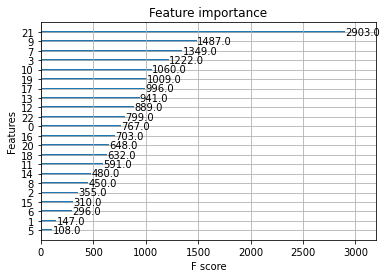

In [77]:
from xgboost import plot_importance
plot_importance(model_xgb)

In [78]:
test['label'] = y_pred + 1

In [79]:
output = test[['id_bh', 'label']]

In [80]:
output

,id_bh,label
0,116303809,5
1,116301808,2
2,131644973,5
3,131264273,3
4,113003795,6
...,...,...
18129,7011008716,2
18130,2616106484,2
18131,2614103407,2
18132,2615002452,4


In [81]:
output.to_csv('output.csv', index=False)